In [4]:
#!pip uninstall matplotlib pandas numpy matplotlib seaborn


In [5]:
# Esta v
#!pip install "numpy<2"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar el archivo CSV
url = 'https://raw.githubusercontent.com/AI-School-F5-P3/G1_ML_Airline/main/data/airline_passenger_satisfaction.csv'
df = pd.read_csv(url)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
# Verificar datos nulos por columna
missing_data = df.isnull().sum()
print("Datos nulos por columna:\n", missing_data)

# Verificar el porcentaje de datos nulos en cada columna
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPorcentaje de datos nulos por columna:\n", missing_percentage)


Datos nulos por columna:
 Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes       

In [9]:
# Verificar si hay datos duplicados
duplicated_rows = df.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicated_rows)



Número de filas duplicadas: 0


In [10]:
# Identificar las variables numéricas que no son categóricas
# Excluyendo las que parecen ser calificaciones o resultados de encuestas
non_categorical_numeric_cols = ['Age', 'Flight Distance', 
                                'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Obtener estadísticas descriptivas solo de esas variables
non_categorical_descriptive_stats = df[non_categorical_numeric_cols].describe()

# Mostrar el resultado
print(non_categorical_descriptive_stats)


                 Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      1189.448375                   14.815618   
std        15.114964       997.147281                   38.230901   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       843.000000                    0.000000   
75%        51.000000      1743.000000                   12.000000   
max        85.000000      4983.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.178678  
std                   38.698682  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000  


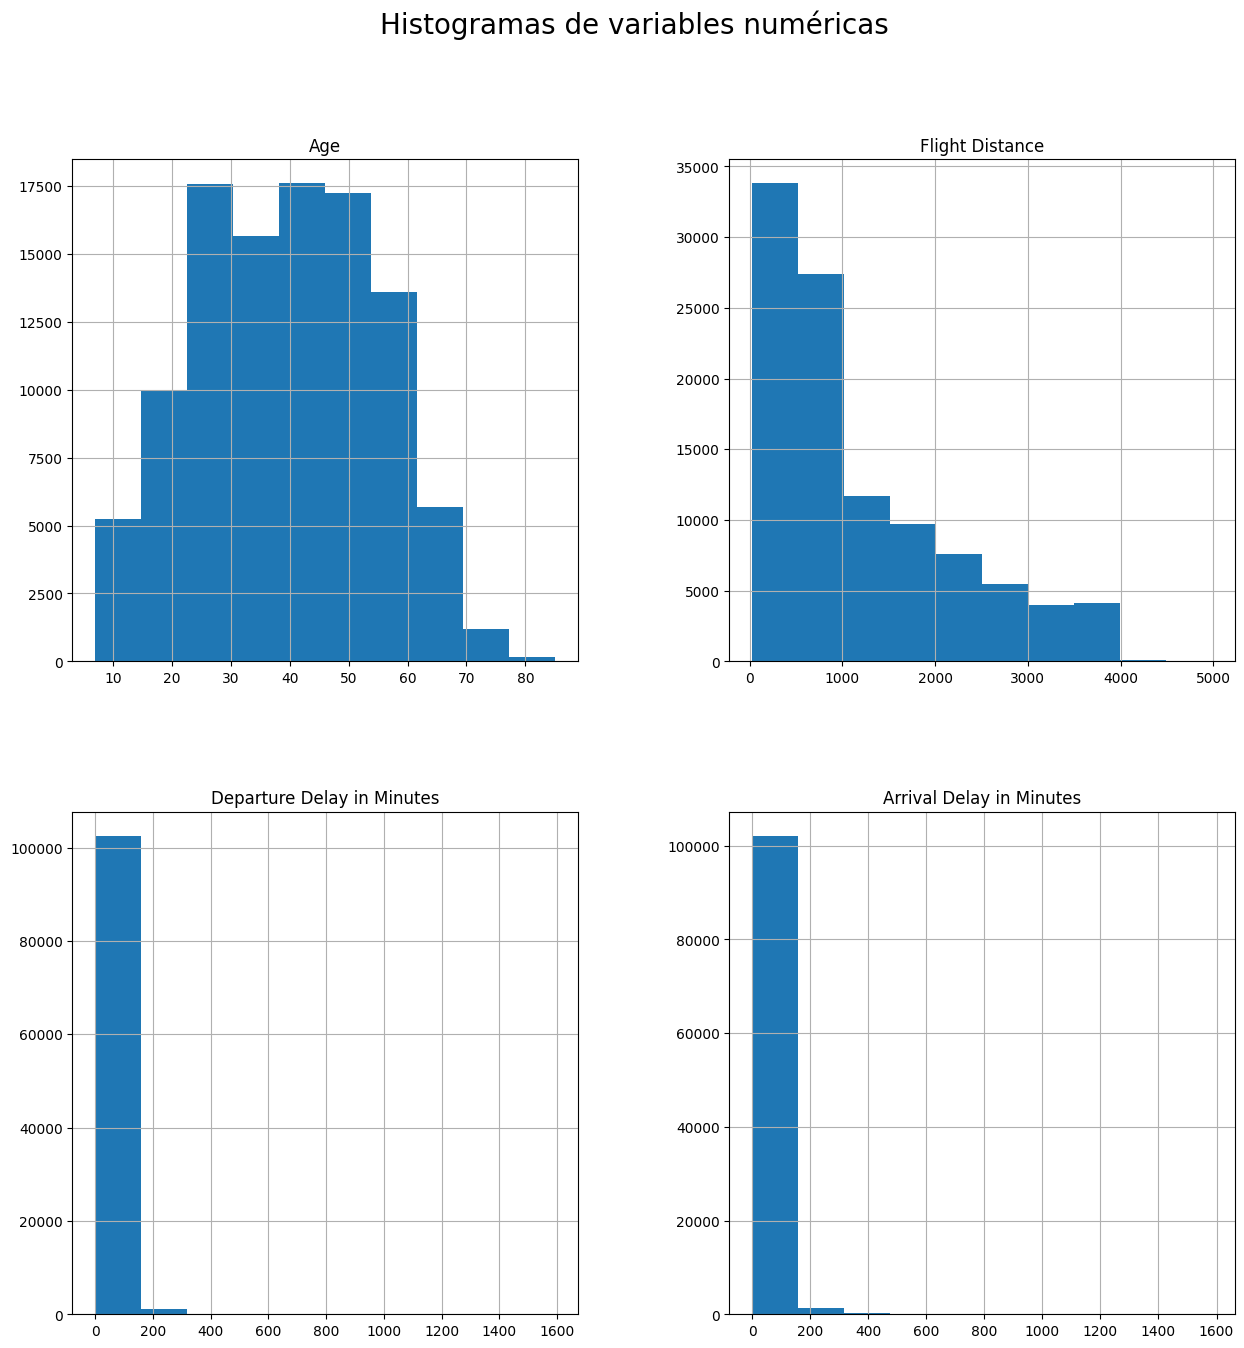

In [11]:
# Histograma para variables numéricas
df[non_categorical_numeric_cols].hist(figsize=(15, 15))
plt.suptitle('Histogramas de variables numéricas', fontsize=20)
plt.show()

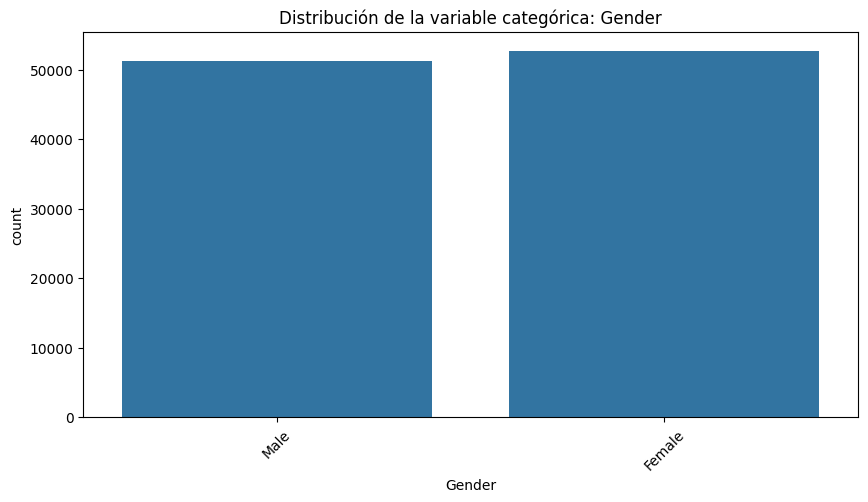

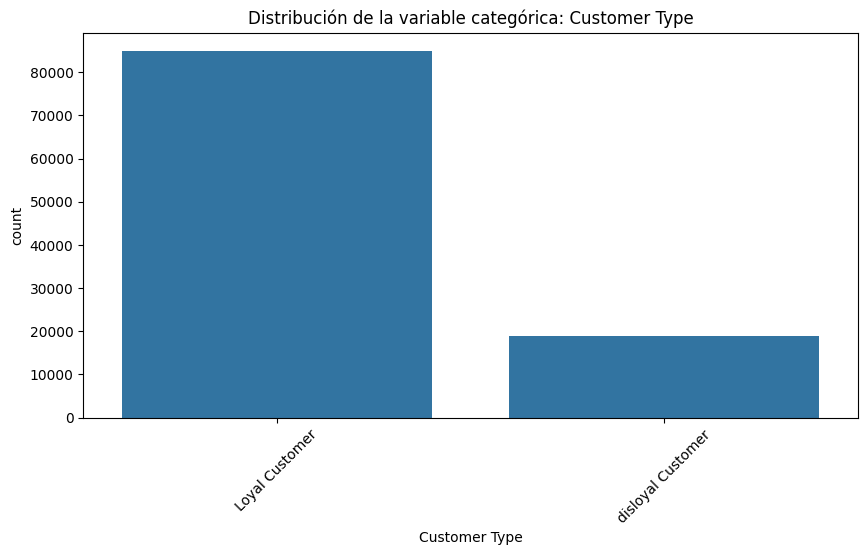

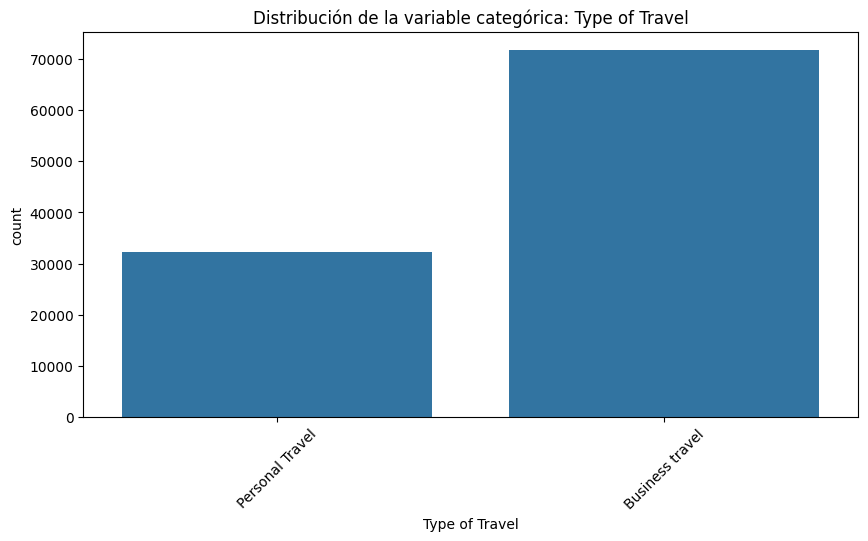

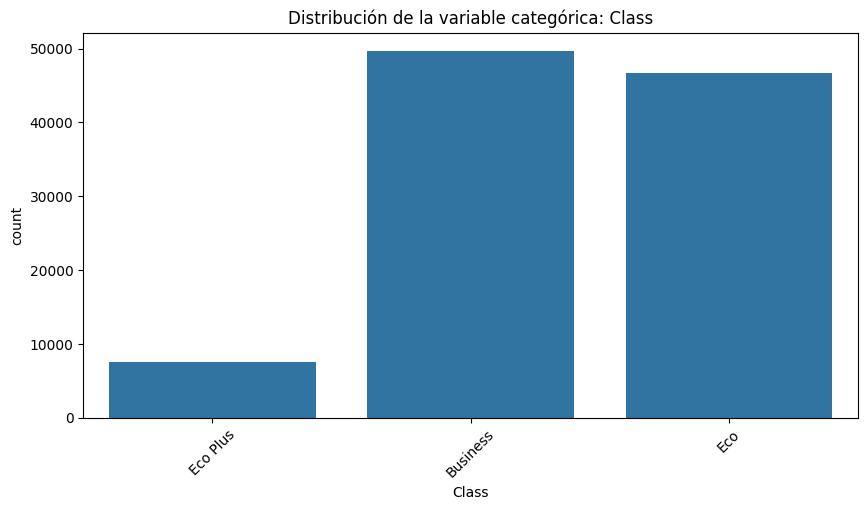

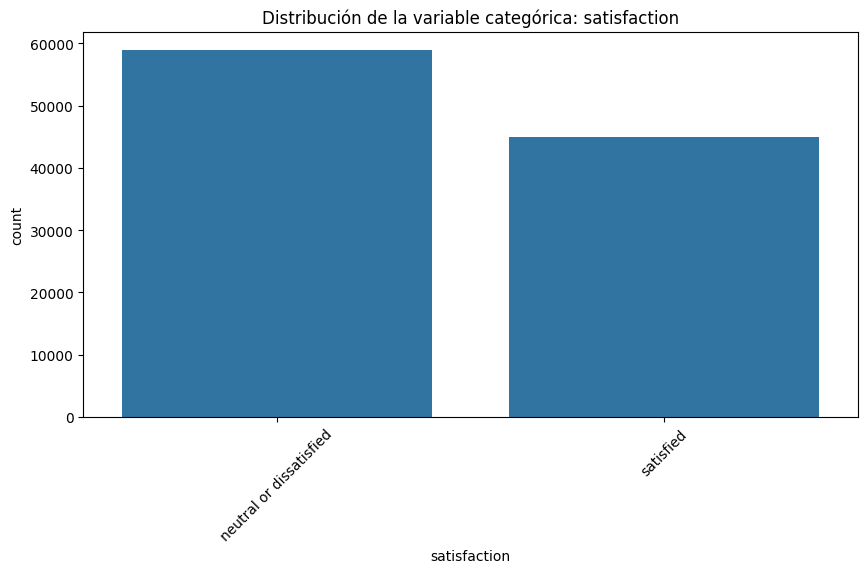

In [12]:
# Identificar las columnas categóricas 
categorical_cols = df.select_dtypes(include=['object']).columns

# Gráfico de barras para variables categóricas
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xticks(rotation=45)
    plt.show()

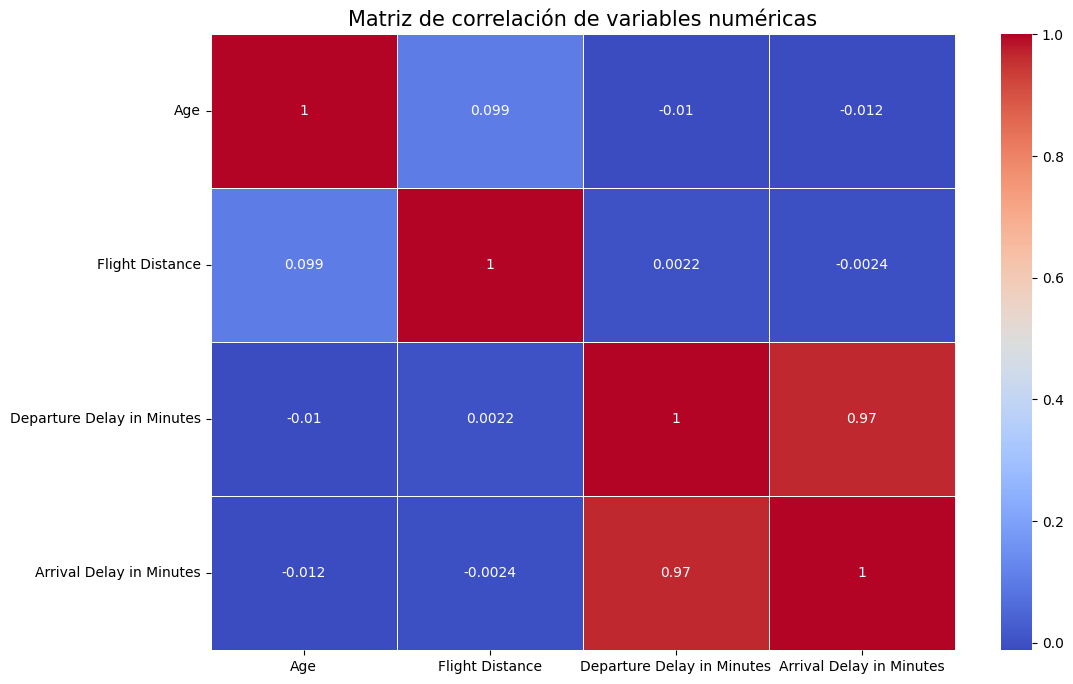

In [13]:
# Matriz de correlación para variables numéricas
correlation_matrix = df[non_categorical_numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de variables numéricas', fontsize=15)
plt.show()

In [14]:
#Verificar si hay variables únicas
print(df['satisfaction'].unique())


['neutral or dissatisfied' 'satisfied']


In [15]:

# Calcular los z-scores para las columnas numéricas
z_scores = np.abs(stats.zscore(df[non_categorical_numeric_cols]))
z_scores = pd.DataFrame(z_scores, columns=non_categorical_numeric_cols)

# Definir un umbral (threshold) para considerar un valor como outlier
threshold = 3  # Puedes ajustar este valor según sea necesario

In [16]:
# Crear un diccionario para almacenar las columnas con outliers
columns_with_outliers = {}

# Identificar y almacenar las columnas que tienen outliers
for col in non_categorical_numeric_cols:
    outliers_in_col = z_scores[col] > threshold
    if outliers_in_col.any():
        columns_with_outliers[col] = outliers_in_col.sum()

# Mostrar las columnas que tienen outliers y la cantidad de outliers en cada una
print("Columnas con outliers y la cantidad de outliers en cada una:")
for col, count in columns_with_outliers.items():
    print(f"{col}: {count} outliers")

Columnas con outliers y la cantidad de outliers en cada una:
Age: 17 outliers
Flight Distance: 58 outliers
Departure Delay in Minutes: 2222 outliers


In [17]:
# Eliminar filas con datos nulos
df_clean = df.dropna()

# Mostrar información sobre el nuevo DataFrame
print("Número de filas originales:", df.shape[0])
print("Número de filas después de eliminar datos nulos:", df_clean.shape[0])


Número de filas originales: 103904
Número de filas después de eliminar datos nulos: 103594


In [18]:
print(df_clean.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [19]:
# Eliminar columnas que sean IDs o índices de las numéricas
df_cleaned = df_clean.drop(columns=['Unnamed: 0', 'id'], errors='ignore')

print(df_cleaned.columns)


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


He realizado un análisis exploratorio de datos (EDA) de la base de datos. A continuación resumo los principales hallazgos:

1. Estructura de los Datos
El conjunto de datos contiene 103,904 filas y 25 columnas.
Tipos de datos:
19 columnas son numéricas (tipo int64 o float64).
5 columnas son categóricas (tipo object).

2. Variables Categóricas
Gender: Tiene dos categorías: Female y Male, con una distribución aproximadamente equilibrada.
Customer Type: Se divide en Loyal Customer (clientes leales) y disloyal Customer (clientes no leales).
Type of Travel: Dos categorías principales: Business travel (viaje de negocios) y Personal Travel (viaje personal).
Class: Tres categorías: Business, Eco, y Eco Plus.
satisfaction: Dos categorías: neutral or dissatisfied y satisfied.

3. Variables Numéricas
Las principales variables numéricas relevantes incluyen:

Age (Edad)
Flight Distance (Distancia de vuelo)
Departure Delay in Minutes (Retraso en la salida en minutos)
Arrival Delay in Minutes (Retraso en la llegada en minutos)

Estadísticas Descriptivas:

Edad: Rango de 7 a 85 años, con una media de aproximadamente 39 años.
Distancia de Vuelo: Varía desde 31 hasta 4983 km, con una media de alrededor de 1189 km.
Retrasos: La mayoría de los vuelos no tienen retraso (mediana de 0 minutos), pero algunos vuelos tienen retrasos significativos (hasta 1592 minutos en la salida y 1584 minutos en la llegada).

4. Visualización
Histogramas: Se crearon histogramas para cada variable numérica para observar la distribución de los datos.
Gráficos de Barras: Para las variables categóricas, se generaron gráficos de barras para ver la distribución de las categorías.
Matriz de Correlación: Se generó una matriz de correlación para analizar las relaciones entre las variables numéricas.

6. Observaciones Clave
La distribución de la edad muestra que la mayoría de los pasajeros están en el rango de 30 a 50 años.
La distancia de vuelo tiene una distribución bastante dispersa, lo que podría reflejar diferentes tipos de vuelos (cortos, medianos y largos).
Los retrasos, aunque en promedio son bajos, tienen una variabilidad significativa, lo que podría ser relevante para el análisis de satisfacción del cliente.
 

In [20]:
# Reemplazar los valores en la columna 'satisfaction': 'satisfied' -> 1, 'neutral or dissatisfied' -> 0
df_cleaned.loc[:, 'satisfaction'] = df_cleaned['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Reemplazar los valores en la columna 'Customer Type': 'Loyal Customer' -> 1, 'disloyal Customer' -> 0
df_cleaned.loc[:, 'Customer Type'] = df_cleaned['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

# Reemplazar los valores en la columna 'Type of Travel': 'Personal Travel' -> 0, 'Business travel' -> 1
df_cleaned.loc[:, 'Type of Travel'] = df_cleaned['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

# Reemplazar los valores en la columna 'Class': 'Eco Plus' -> 0, 'Eco' -> 1, 'Business' -> 2
df_cleaned.loc[:, 'Class'] = df_cleaned['Class'].map({'Eco Plus': 0, 'Eco': 1, 'Business': 2})

# Reemplazar los valores en la columna 'Gender': 'Female' -> 0, 'Male' -> 1
df_cleaned.loc[:, 'Gender'] = df_cleaned['Gender'].map({'Female': 0, 'Male': 1})


# Almacena el nuevo csv en la carpeta data
path_data = '../data/airline_passenger_satisfaction_cleaned.csv'


# Guardar el DataFrame modificado en un nuevo archivo CSV
#df_cleaned.to_csv('airline_passenger_satisfaction_cleaned.csv', index=False)
df_cleaned.to_csv(path_data, index=False)

#Imprimir primeras filas para ver el cambio:

df_cleaned.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
